<a href="https://colab.research.google.com/github/dganguli/tlon/blob/master/train_cnn_synthetic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
import torch

import matplotlib.pyplot as plt
from torch.autograd import Variable


print("torch cuda is available: {}".format(torch.cuda.is_available()))
print("number of gpus: {}".format(torch.cuda.device_count()))
print("1st gpu is of type: {}".format(torch.cuda.get_device_name(0)))

cuda = True if torch.cuda.is_available() else False

torch cuda is available: True
number of gpus: 1
1st gpu is of type: Tesla P100-PCIE-16GB


In [2]:
import sys
! git clone https://github.com/dganguli/tlon.git
%cd /content/tlon/
! git pull
sys.path.append('/content/tlon')

!pip install showit
from showit import image

Cloning into 'tlon'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 116 (delta 62), reused 76 (delta 33), pack-reused 0
Receiving objects: 100% (116/116), 15.69 MiB | 36.86 MiB/s, done.
Resolving deltas: 100% (62/62), done.
/content/tlon
Already up to date.
  Created wheel for showit: filename=showit-1.1.4-cp36-none-any.whl size=3642 sha256=adf35b726245381b1f7fdaa97602cc4c5295b67e10c35d76cbf93fbfd3528a3f
  Stored in directory: /root/.cache/pip/wheels/c9/60/f6/132ceb04843c22c202133ae966fc8fc1b7950aac6372e65d30
Successfully built showit


In [0]:
from cnn import CNNTrainer
from data import load_synthetic_mnist

train_loader, test_loader = load_synthetic_mnist('/content/tlon/trained_models/generator.pth')

In [4]:
cnn_trainer = CNNTrainer(train_loader, test_loader, save_path='/content')

start = time.time()
cnn_trainer.train(log_interval=100)
elapsed = time.time()
total = elapsed-start
print("time elapsed: {} seconds".format(total))


Test set: Avg. loss: 2.2969, Accuracy: 1009/10000 (10%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306144
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.176469
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.533174
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.061827
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.677658
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.611270
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.700988
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.909858
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.407436
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.363457

Test set: Avg. loss: 0.1308, Accuracy: 9598/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.411037
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.412820
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.219570
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.267738
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.335638
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.218944
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.250456
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.319

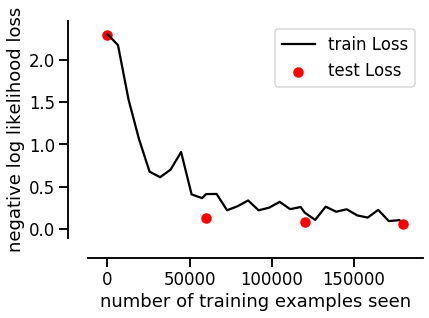

In [5]:
sns.set_context('talk')
fig = plt.figure()
plt.plot(cnn_trainer.train_counter, cnn_trainer.train_losses, 'k')
plt.scatter(cnn_trainer.test_counter, cnn_trainer.test_losses, color='r')
plt.legend(['train Loss', 'test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
sns.despine(offset=20)